<a href="https://colab.research.google.com/github/TillVollmer5/DSF-FS2022-Till-Vollmer/blob/main/CodingTask1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Science Fundamentals for DCBP, S. Haug, University of Bern 

# Coding Task 1

- Deadline (upload to Ilias): 2022-03-20 24:00
- Estimated effort: 2-5 hours
- Data on Ilias (4ms_...) with metadata file CCD-Metadata


## Tasks (maximum 12.5 points)

- Write a method (function) which removes the header information in the datafile and saves that information into a separate textfile. [0.5 points] 
- Write a function which reduces the data resolution by averaging over 1, 2, 3 and 4 nm wavelengths. Save these 4 new reduced datasets in new files. Do this (1) by writing an explicit loop and (2) by using pandas methods. Measure the running times of the two approaches. [6 points]
- Write a function which takes two wavelengths as input and plots the difference of the data at these lengths over time. [2 points] 
- Let the x-axis be in seconds, label the axes with names and units, label the plot with color and legend, make a title for the plot. Save the plot to a file. [2 points]
- Plot the full and the reduced datasets in the same figure. Is there any visual difference? [2 points]

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [92]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
path = '/content/drive/MyDrive/DSF/4ms_10av_30s_Absorbance_10-32-04-868.txt'
df = pd.read_csv(path, delimiter='\t', header=13)
df.head()

Mounted at /content/drive


,Unnamed: 0,Unnamed: 1,316.6137,316.7492,316.8847,317.0203,317.1558,317.2913,317.4268,317.5623,...,778.9703,779.089,779.2076,779.3263,779.4449,779.5636,779.6822,779.8008,779.9194,780.0381
0,2018-10-25 10:32:04.789000,1540456324789,0.329672,0.329672,0.329672,0.090294,-0.716926,-1.829304,-0.686330,-0.428776,...,-0.038483,-0.039623,-0.036920,-0.037309,-0.037299,-0.037476,-0.036856,-0.036853,-0.039100,-0.035545
1,2018-10-25 10:32:04.878000,1540456324878,-0.044412,-0.044412,-0.044412,0.157632,-0.672423,-2.183981,-0.492421,-0.000000,...,-0.039428,-0.038486,-0.037309,-0.036357,-0.037289,-0.038728,-0.037214,-0.036902,-0.040210,-0.038165
2,2018-10-25 10:32:04.962000,1540456324962,0.338219,0.338219,0.338219,0.330993,-0.879836,-0.000000,-0.559845,-0.000000,...,-0.037725,-0.037534,-0.036560,-0.036152,-0.036554,-0.036875,-0.037351,-0.036746,-0.038686,-0.036903
3,2018-10-25 10:32:05.046000,1540456325046,-0.049682,-0.049682,-0.049682,0.519086,-0.681150,-0.000000,-0.417230,-0.000000,...,-0.037613,-0.037168,-0.036369,-0.034549,-0.036252,-0.037948,-0.036713,-0.035706,-0.038203,-0.036822
4,2018-10-25 10:32:05.129000,1540456325129,0.335086,0.335086,0.335086,-0.041393,-0.000000,-1.802774,-0.510417,-0.000000,...,-0.040919,-0.038288,-0.035840,-0.035638,-0.039504,-0.040093,-0.039953,-0.037656,-0.038082,-0.035900


In [93]:
def save_data_ccd():
      data=pd.read_csv(path, delimiter='\t', header=13)
      f= open('CCD-Data.cvs', 'w+')
      f.write(str(data))
      f.close      
        
save_data_ccd()

def save_header_ccv():
      header=''  
      with open (path, 'r') as instream:
        textlines = instream.readlines()
      for i in range(13):
          header = header + str(textlines[i])
      f= open("CCD-Data-header.txt","w+")
      f.write(header)
      f.close()
      instream.close

save_header_ccv()

In [95]:
def nm1_averaged_l():
  average_list= []
  average_rows= []
  for i in range(2, 3650, 9):
    r= i + 8
    for f in range(0, 355, 1):
      row = df.iloc[f, i:r].sum() / 8
      average_rows.append(row) #need to change somethig here so that it doesn't stack it behind
    average_list.append(average_rows)
  average_list_df= pd.DataFrame(average_list)
  average_list_df.to_csv('average_2nm_ccd_l.csv')

#nm1_averaged_l()

def nm1_averaged_s():
  df_array= np.array(df)
  average_values_array= np.empty((355, 406), float)
  for i in range(2, 3650, 9):
    df_subarray= df_array[0:355, i:(i+8)]
    new_df_subarray= df_subarray.mean(axis=1)
    np.insert(average_values_array, i, new_df_subarray)
  pd.DataFrame(average_values_array).to_csv('average_1nm_ccd_s.csv')

nm1_averaged_s()

def nm2_averaged_s():
  df_array= np.array(df)
  average_values_array= np.empty((356, 229), float)
  for i in range(2, 3650, 17):
    df_subarray= df_array[0:355, i:(i+16)]
    new_df_subarray= df_subarray.mean(axis=1)
    np.insert(average_values_array, i, new_df_subarray)
  pd.DataFrame(average_values_array).to_csv('average_2nm_ccd_s.csv')

nm2_averaged_s()

def nm3_averaged_s():
  df_array= np.array(df)
  average_values_array= np.empty((356, 152), float)
  for i in range(2, 3650, 25):
    df_subarray= df_array[0:355, i:(i+24)]
    new_df_subarray= df_subarray.mean(axis=1)
    np.insert(average_values_array, i, new_df_subarray)
  pd.DataFrame(average_values_array).to_csv('average_3nm_ccd_s.csv')

nm3_averaged_s()

def nm4_averaged_s():
  df_array= np.array(df)
  average_values_array= np.empty((356, 114), float)
  for i in range(2, 3650, 33):
    df_subarray= df_array[0:355, i:(i+32)]
    new_df_subarray= df_subarray.mean(axis=1)
    np.insert(average_values_array, i, new_df_subarray)
  pd.DataFrame(average_values_array).to_csv('average_4nm_ccd_s.csv')

nm4_averaged_s()

Something doesn't work but i can't figure it out. For the long approach, it seems like the appending process to the list doesn't yield the right output. (for the 2nm, 3nm and 4nm averaging, the range should be addabted to the other values)
The short approach seems to work better, when taking a look at the output file, but all the index names, etc. are not there anymore.
To call one of the functions, remove the '#' below the definition of the function.

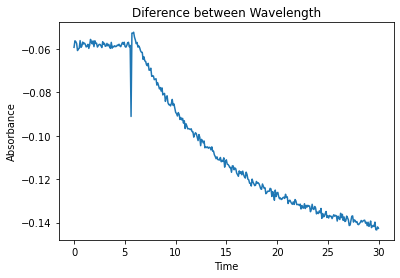

In [96]:
time= df.iloc[:, 1]/1000
time_corrected= time - 1540456324.789
diff_wl= -df.iloc[:, 1950] - df.iloc[:, 1800]

fig, ax = plt.subplots()
ax.set_title('Diference between Wavelength')
ax.set_ylabel('Absorbance')
ax.set_xlabel('Time')
ax.plot(time_corrected, diff_wl)
plt.savefig('CCD-Plot.png')

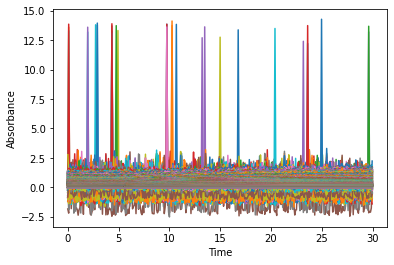

In [97]:
time= df.iloc[:, 1]/1000
time_corrected= time - 1540456324.789
diff_wl= df.iloc[:,2::]
#diff_wl_reduced= average_values_array[:, :]

fig, ax = plt.subplots()
ax.set_ylabel('Absorbance')
ax.set_xlabel('Time')
ax.plot(time_corrected, diff_wl)
#ax.plot(time_corrected, diff_wl_reduced)
plt.savefig('CCD-Plot_2.png')

Because the data reduction didn't succed, it's not possible to plot the data, which is why they are written as a coment.